## Owais Aijaz 7610
## oa07610@st.habib.edu.pk

## CS/CE 457/464 Homework 07

In [634]:
import pandas as pd
import numpy as np
from sklearn import tree #Decision Trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [488]:
df = pd.read_csv('Admission_Chance_Classification.csv')

In [490]:
df.head()

GRE_Score  TOEFL_Score  University_Rating   SOP  LOR   CGPA Research Admit
0        337          118                  4   4.5   4.5  9.65      YES   YES
1        324          107                  4   4.0   4.5  8.87      YES   YES
2        316          104                  3   3.0   3.5  8.00      YES   YES
3        322          110                  3   3.5   2.5  8.67      YES   YES
4        314          103                  2   2.0   3.0  8.21       NO   YES

In [492]:
X = df.drop(['Admit'],axis=1)
Y = df['Admit']

X = pd.get_dummies(X, columns = ['Research'], dtype=int)

In [494]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [496]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (280, 8)
X_test shape: (120, 8)
Y_train shape: (280,)
Y_test shape: (120,)


In [564]:
dt = tree.DecisionTreeClassifier(random_state=99)

In [566]:
dtmodel = dt.fit(X_train, Y_train)

In [568]:
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, Y_train)
print("Training Accuracy: ",acc*100)

Training Accuracy:  100.0


In [570]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, Y_test)
print("Testing Accuracy: ",acc*100)

Testing Accuracy:  89.16666666666667


In [572]:
text_representation = tree.export_text(dtmodel)
print(text_representation)

|--- feature_5 <= 7.85
|   |--- feature_4 <= 2.75
|   |   |--- feature_0 <= 301.50
|   |   |   |--- class: NO
|   |   |--- feature_0 >  301.50
|   |   |   |--- feature_5 <= 7.57
|   |   |   |   |--- feature_0 <= 313.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_0 >  313.50
|   |   |   |   |   |--- class: NO
|   |   |   |--- feature_5 >  7.57
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: NO
|   |--- feature_4 >  2.75
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: YES
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: NO
|--- feature_5 >  7.85
|   |--- feature_4 <= 1.75
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: NO
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: YES
|   |--- feature_4 >  1.75
|   |   |--- feature_5 <= 8.31
|   |   |   |--- feature_5 <= 8.29
|   |   |   |   |--- feature_1 <= 109.50
|   |   |   |   |   |--- feature_1 <= 10

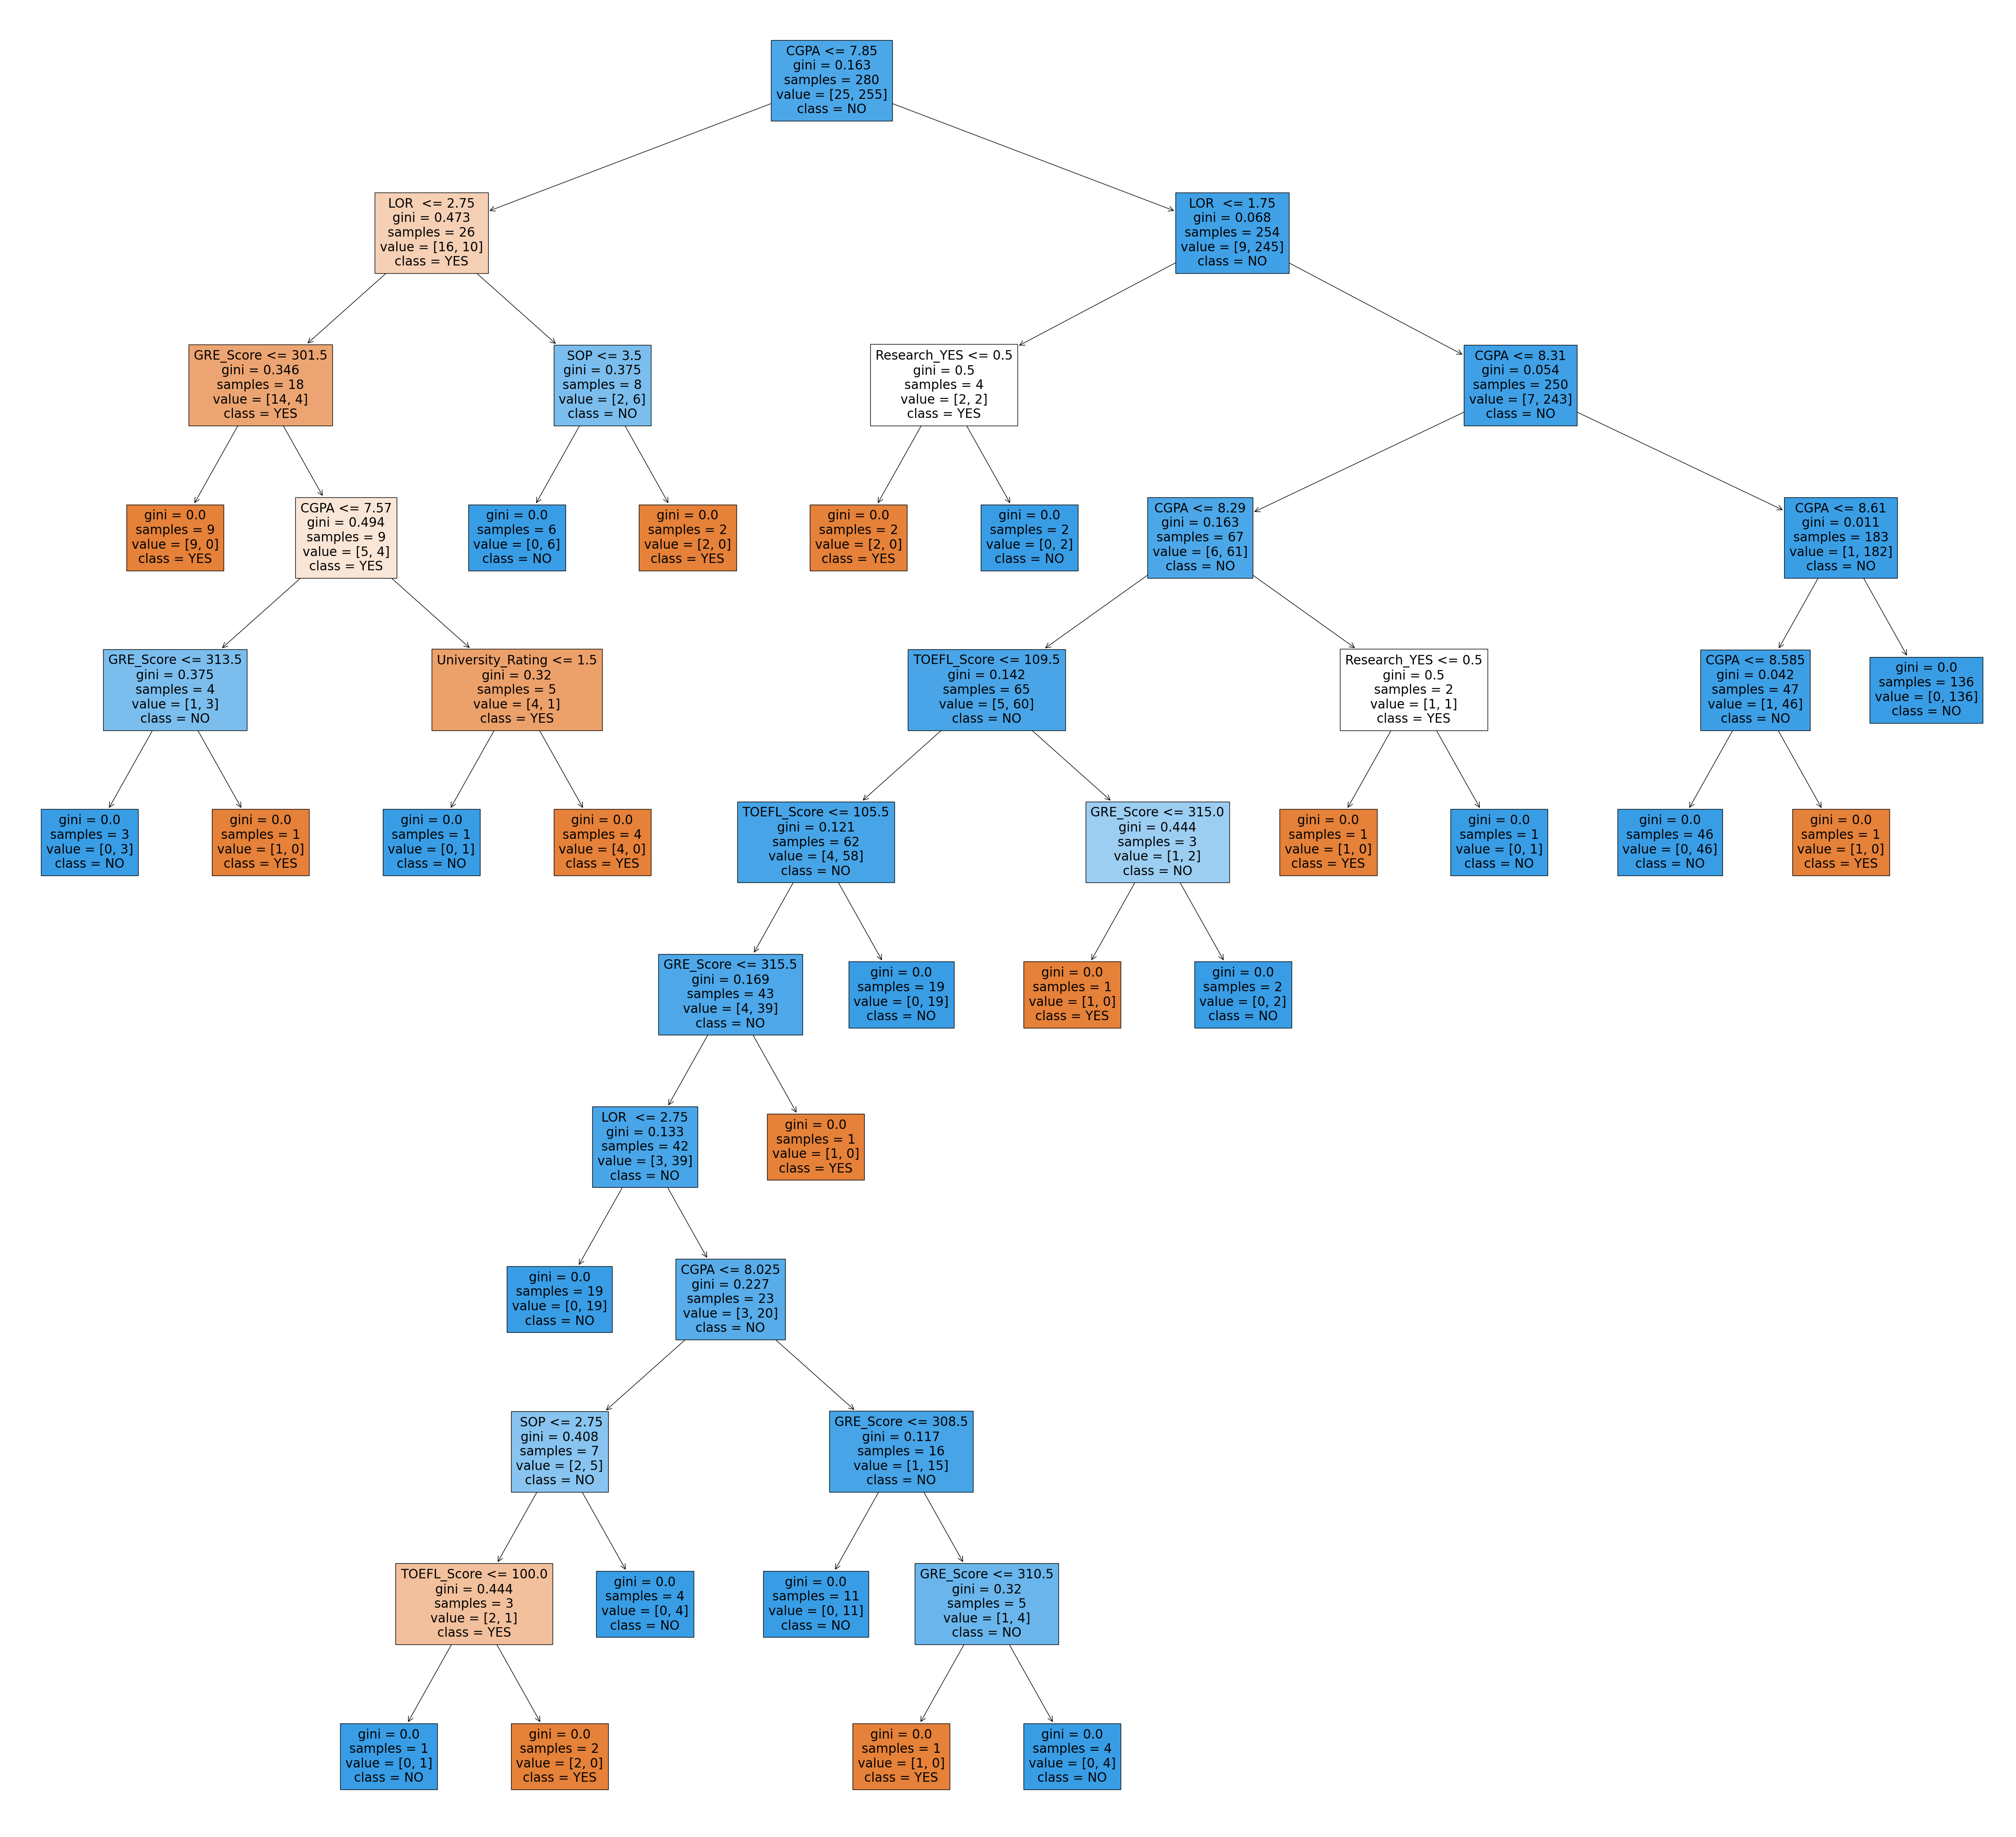

In [574]:
fig = plt.figure(figsize=(60,55))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [576]:
fig.savefig("decistion_tree.png")

Text(0.5, 0, 'Decision Tree Feature Importance')

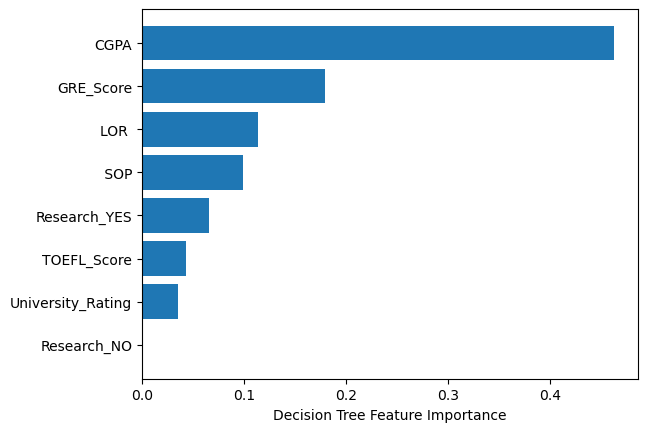

In [582]:
sorted_idx = dtmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), dtmodel.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

##### Interpretation:

The tree is very dense having depth of 11. This shows that the model is very complex having high variance. Which means that it is fitting very specific to training data hence getting 100% accuracy on the training data (overfitting). It is not that generalised as it performs relatively bad on unseen data. If a model doesn't perform well on test data, it means it's not generalised and we need to make it simpler. It is hard to interpret as well. In terms of features:

CGPA: Most important attribute (root of the tree). 

GRE Score: Highly significant, appears near the top of multiple branches. 

SOP and LOR: Important, used in several branches after CGPA and GRE.  

Research: Moderately important, used in some branches. 

University_Rating and TOEFL_Score: Probably not that important.

In [585]:
#With Entropy

In [587]:
dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=99)

In [589]:
dtmodel = dt.fit(X_train, Y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, Y_train)
print("Training Accuracy: ",acc*100)

Training Accuracy:  100.0


In [591]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, Y_test)
print("Testing Accuracy: ",acc*100)

Testing Accuracy:  86.66666666666667


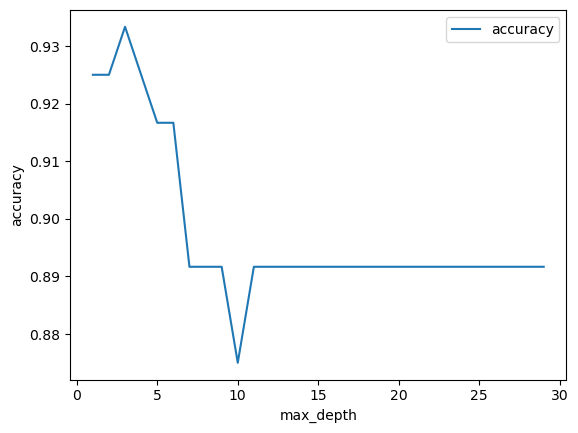

In [593]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=99)
    dtree.fit(X_train, Y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(Y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])

In [595]:
dt = tree.DecisionTreeClassifier(max_depth=3,random_state=99)

In [597]:
dtmodel = dt.fit(X_train, Y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, Y_train)
print("Training Accuracy: ",acc*100)

Training Accuracy:  96.07142857142857


In [599]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, Y_test)
print("Testing Accuracy: ",acc*100)

Testing Accuracy:  93.33333333333333


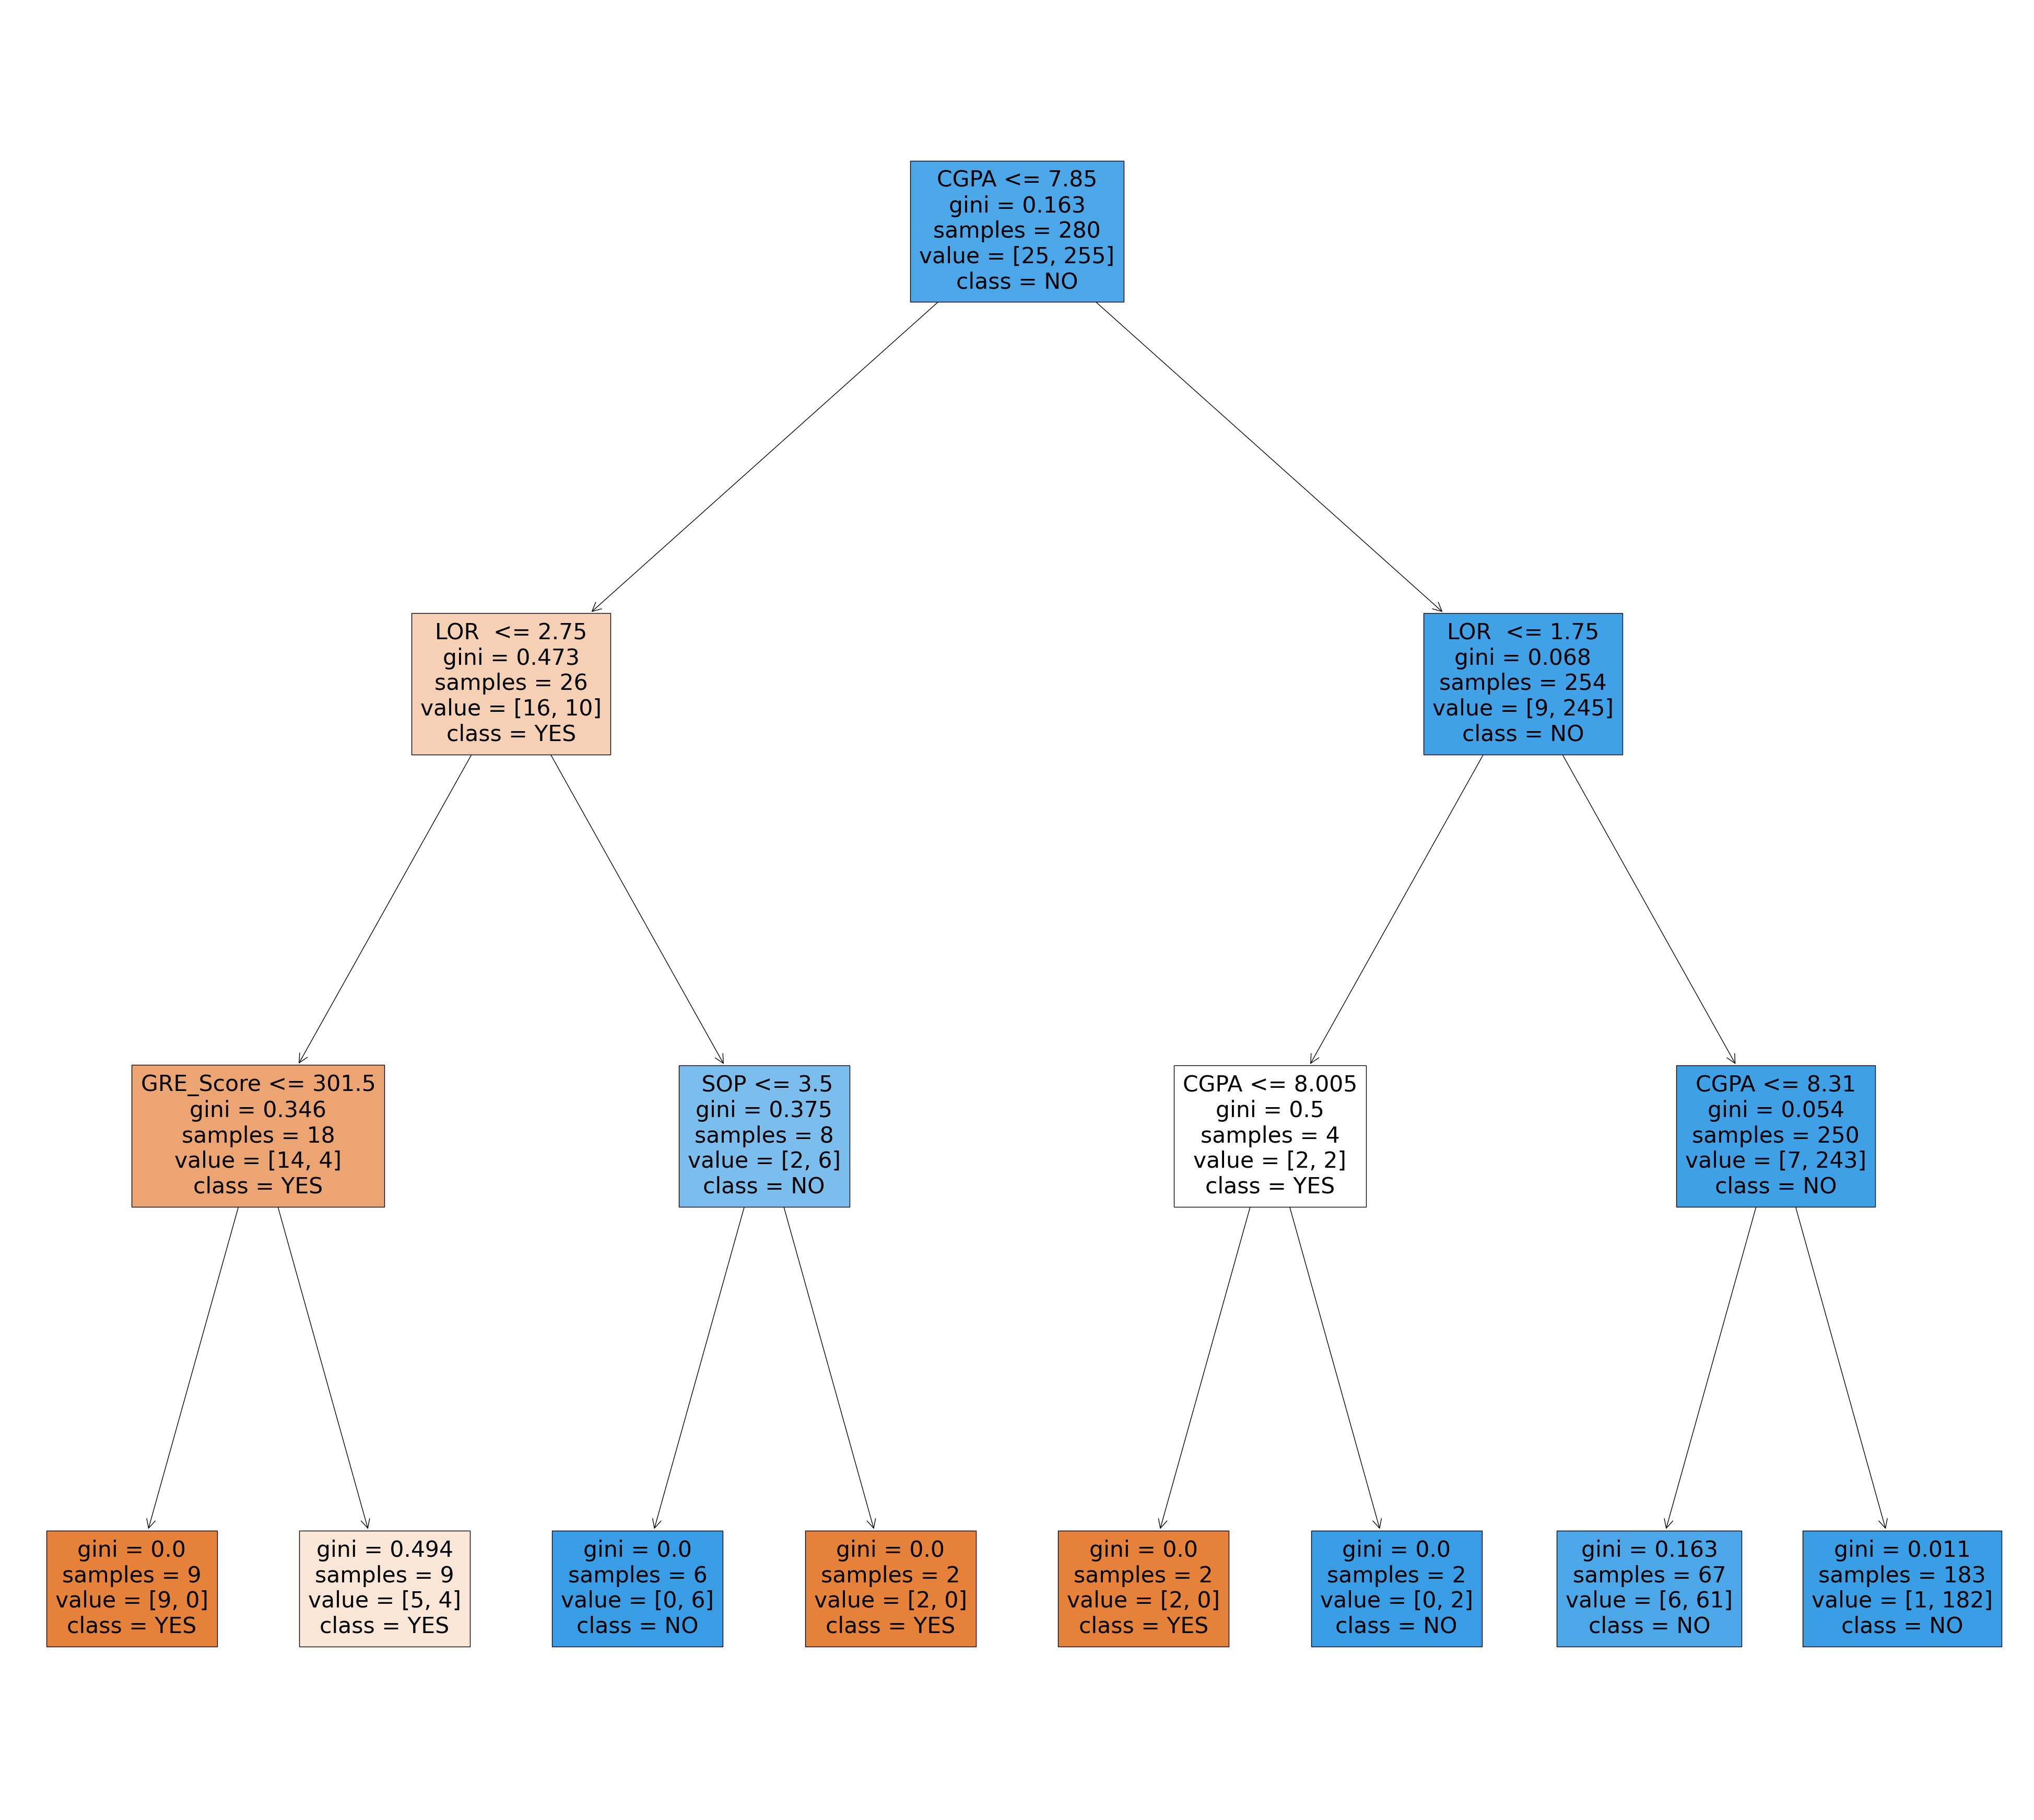

In [601]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [603]:
fig.savefig("pruned_decistion_tree.png")

##### Interpretation:

The original tree is much deeper and has more branches. Which shows a more complex model with finer decisions at each level, capturing more specific patterns in the training data. The pruned tree has fewer layers, reducing complexity by eliminating branches that provide minimal predictive power. So it is more generalizable and less prone to overfitting. The original model is likely overfitted to the training data that's why accuracy is 100% on training and around 86% for test data. The pruned version is simpler and should generalize better on unseen data, so accuracy is around 93.3%. The pruned tree is easier to interpret as well. It takes CGPA at the root and the most important feature. Then we take into account the LOR and SOP. GRE Scores also come up in a branch. This shows that the rest of the features might not be the most important ones to generalise the model

Text(0.5, 0, 'Decision Tree Feature Importance')

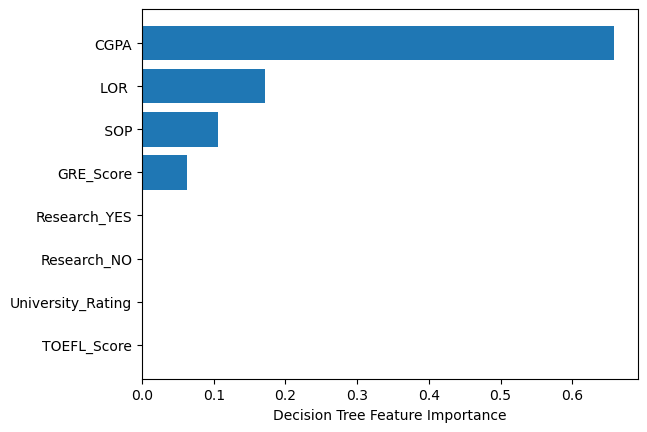

In [605]:
sorted_idx = dtmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), dtmodel.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [608]:
#Random Forest

In [610]:
rf = RandomForestClassifier(n_estimators=100, random_state=99)

In [612]:
rfmodel = rf.fit(X_train, Y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, Y_train)
acc*100

100.0

In [614]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, Y_test)
acc*100

95.0

Text(0.5, 0, 'Random Forest Feature Importance')

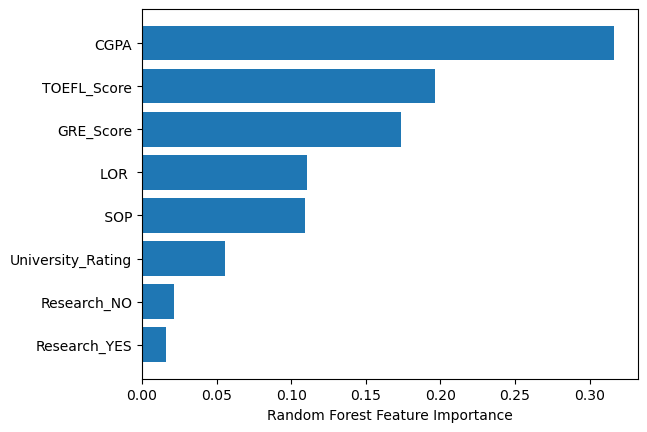

In [616]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

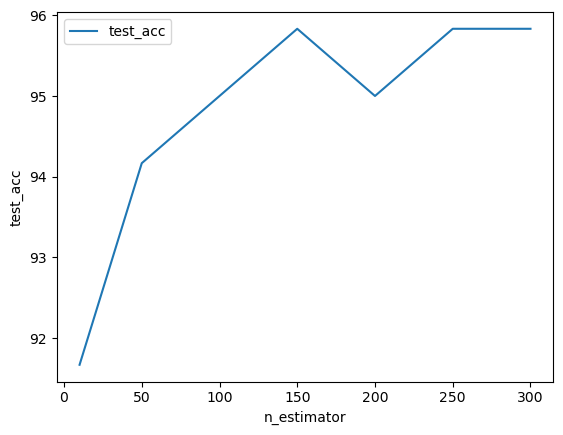

In [618]:
n_estimator = [10,50,100,150,200,250,300]
train_acc=[]
test_acc=[]
for i in n_estimator:
    rf = RandomForestClassifier(n_estimators=i, random_state=99)
    rfmodel = rf.fit(X_train, Y_train)
    train_pred = rfmodel.predict(X_train)
    acc = accuracy_score(train_pred, Y_train)
    train_acc.append(acc*100)
    test_pred = rfmodel.predict(X_test)
    acc = accuracy_score(test_pred, Y_test)
    test_acc.append(acc*100)

plt.plot(n_estimator,test_acc)
plt.xlabel('n_estimator')
plt.ylabel('test_acc')
plt.legend(["test_acc"])

##### Interpretation:

Plotted a graph of n_estimators for Random Forest vs the accuracy we get. We seee that accuracy increases till around 150, and then mostly stays constant. Except for a dip in accuracy around 180-200. Since the n_estimator parameter controls the number of trees inside the classifier. We may think that using many trees to fit a model will help us to get a more generalized result, but this is not always the case. However, it will not cause any overfitting but can certainly increase the time complexity of the model. So we need to find a sweet spot. For our scenario, 150 seems alright.

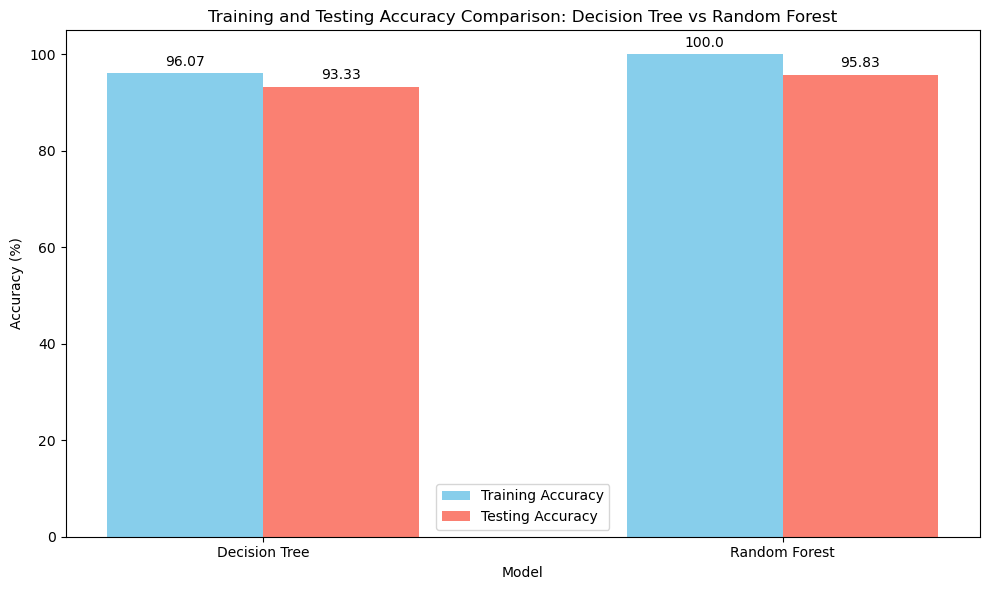

In [638]:
#Final Comparison: Decision Tree using max_depth=3 and Random Forest using n_estimators=150

#Decision Trees
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=99)
dt.fit(X_train, Y_train)
dt_train_acc = accuracy_score(Y_train, dt.predict(X_train)) * 100
dt_test_acc = accuracy_score(Y_test, dt.predict(X_test)) * 100

#Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=99)
rf.fit(X_train, Y_train)
rf_train_acc = accuracy_score(Y_train, rf.predict(X_train)) * 100
rf_test_acc = accuracy_score(Y_test, rf.predict(X_test)) * 100

models = ['Decision Tree', 'Random Forest']
train_acc = [dt_train_acc, rf_train_acc]
test_acc = [dt_test_acc, rf_test_acc]

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_acc, width, label='Training Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_acc, width, label='Testing Accuracy', color='salmon')

# Labels and Title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Training and Testing Accuracy Comparison: Decision Tree vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### Interpretation:

Decision Tree has training accuracy 96. Restriction on depth often limits the model's ability to capture complex patterns, potentially leading to a simpler model that avoids overfitting. Random Forest achieved a higher training accuracy. This is because an ensemble of multiple trees can capture more complex patterns in the data without overfitting. Although limiting the depth in DT helps generalization, a single shallow tree lacks robustness against noise, potentially causing a drop in testing accuracy when the test set includes examples that the tree hasnâ€™t seen during training. Hence testing accuracy for DT is a bit lower than RF. By using multiple estimators (trees), the Random Forest mitigates the risk of overfitting while improving generalization. Each tree in the forest may overfit on its own, but averaging predictions reduces the impact of overfitting, making Random Forest more resilient in general.

In [671]:
#Recommendation

burger_df = pd.read_csv("burger-king-menu-2.csv")
burger_df = burger_df[burger_df['Category'] == 'Burgers'].drop(columns=['Category'])

In [673]:
X = burger_df.drop(columns=['Item'])
Y = burger_df['Item']

In [675]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [677]:
dt = tree.DecisionTreeClassifier(criterion="entropy", random_state=99)
dtmodel = dt.fit(X_train, Y_train)

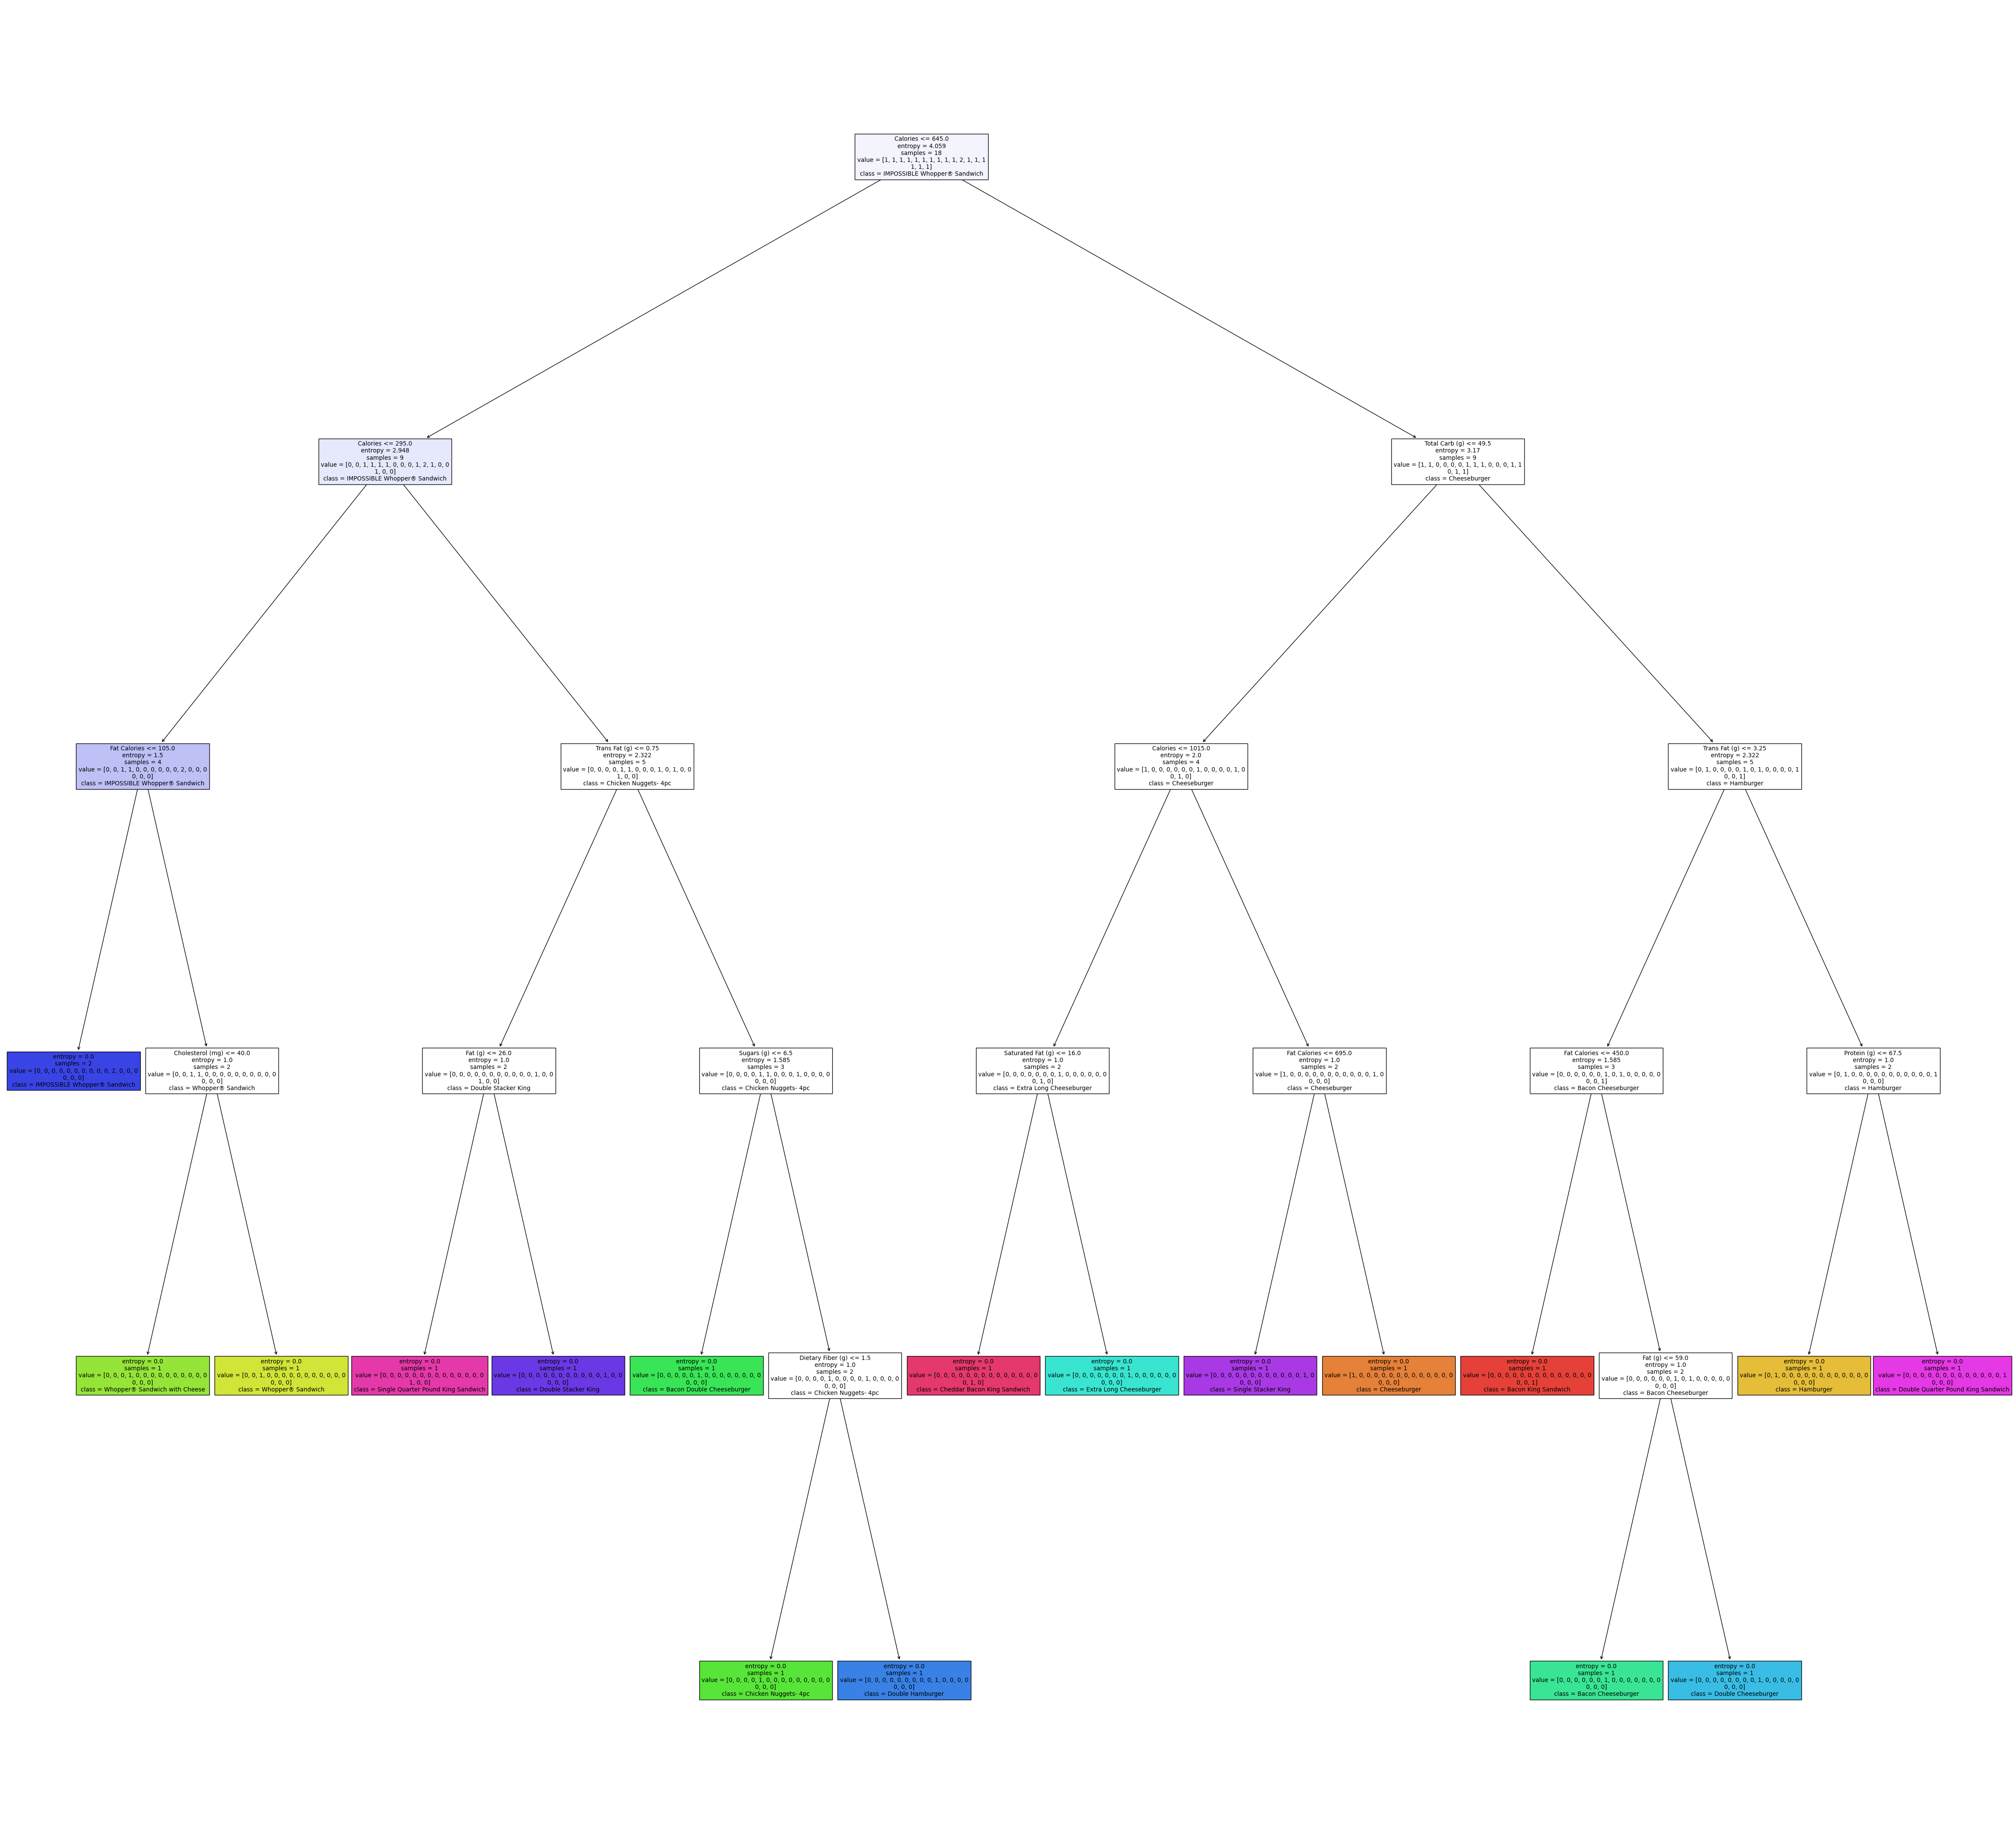

In [679]:
fig = plt.figure(figsize=(60,55))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [681]:
fig.savefig("recommendation_tree.png")

##### Interpretation:

Each split or decision point in the tree evaluates a particular attribute (such as calorie content, fat, saturated fats, sugars, etc.) to determine how foods are grouped. The root node is Calories<=645, which is the most important node. Then we split further based on Total Carbs, Fat Calories etc. Hence we can see the similar items in the leaf/terminal nodes. For exp, Whopper Sandwich and Whopper Sandwich with Cheese are pretty similar. Chicken nuggers are very dissimalar to double cheese burger. Calories, Carbs, and different types of fats' contents, are the most important discriminators.